# Project: Classification - Loan Eligibility Prediction

## Marks: 30

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context: 
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses. 

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan. 

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands) 
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [2]:
data = pd.read_csv("CreditRisk.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


#### Check the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**Observations:**

- There are 614 observations and 13 columns in the data.
- ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History, and Loan_Status are numeric data types. The rest of the variables are of the object data type.
- There are several columns with less than 614 non-null entries i.e. these columns have missing values.
- Loan_ID column is an identifier. Let's check if each entry of the column is unique.

In [4]:
data.Loan_ID.nunique()

614

**Observations:**
- We can see that all the entries of this column are unique. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

## Exploratory Data Analysis and Data Preprocessing

#### Dropping Loan_ID column

In [5]:
data.drop(columns=['Loan_ID'], inplace=True)

#### Summary Statistics for numerical columns

#### Question 1: Write the observations from the below summary statistics (2 Marks) 

In [6]:
#Creating a list of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


# print summary statistics 
#Write your code here
display(data[num_cols].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0


**Observations:__________**
- Applicant income ranges from \\$150 to \\$81000 (this is likely monthly income), with an average of \\$5400. The distribution is likely right-skewed (cf median<mean), meaning a few applicants have very high incomes.
- Co-applicant income ranges from 0 to \\$41700 with an average of \\$1621. The Co-applicants earn less than the main applicants on average. 
- The Loan Amount ranges from 0 to \\$700 K, with an average of \\$141 K. The samples with Loan amount =0 need to be further understood (it would be inconsistent that the applicants arent asking for any money, unless there is another explanation).  
- The Loan Term ranges from 1 year (12 months) to 40 years (480 months). The average term is 30 years is typical for house loans.

#### Feature Engineering

In [7]:
#Converting the scale of loan term from months to years
data['Loan_Amount_Term']=data['Loan_Amount_Term']/12

In [8]:
#Adding the applicant and co-applicant income to get the total income per application
data['total_income']=data['ApplicantIncome'] + data['CoapplicantIncome']

In [9]:
#Dropping the columns as we created a new column which captures the same information
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

#### Check the distribution and outliers for each column in the data

LoanAmount
Skew : 2.36


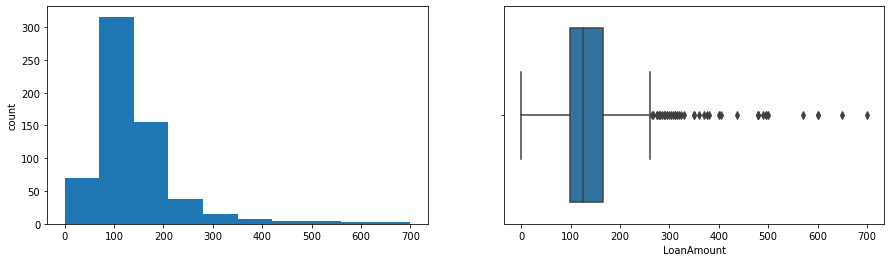

total_income
Skew : 5.63


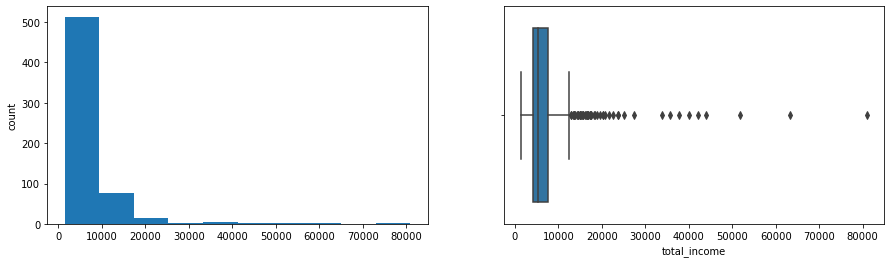

In [10]:
for col in ['LoanAmount', 'total_income']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- Both the variables are highly skewed to the right and have many outliers which can be expected as the data contains different types of areas - Rural, Urban & Semi-Urban. 
- We can observe from the histogram that majority of values for total income are less than 10,000K dollars.

Now, let's check the percentage of observations in each category for all the categorical variables.

#### Checking percentage of each category for categorical variables

#### Question 2: 

- **Write the code to check the percentage of each category for categorical columns (cat_col) (2 Marks)**
- **Write your observations (2 Marks)**

In [11]:
#Creating list of categorical columns
cat_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History','Property_Area', 'Loan_Status']

for col in cat_col:
    print(data[col].value_counts(normalize=True)) #Write your code here
    print('*'*40)                #Print the * 40 times to separate different variables

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64
****************************************
Yes    0.651391
No     0.348609
Name: Married, dtype: float64
****************************************
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64
****************************************
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64
****************************************
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64
****************************************
1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
****************************************
1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64
****************************************


**Observations:___________**
- Applicants are typically Male (81%), Married (65%), with no dependents (58%), an education at graduate level (78%), are self-employed (85%) with a good credit history (84%).
- Applicants are equally from Urban, Semiurban or Rural areas
- 69% of loans are approved, while 31% are rejected (the dataset is not too unbalanced between majority/minority classes).  

#### Imputing missing values

In [12]:
#Imputing missing values with mode for the categorical variables 
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(value=data[col].mode()[0], inplace=True)

In [13]:
#Replacing 0's with null values in loan amount 
data.LoanAmount.replace(0, np.nan, inplace=True)

#Imputing null values in loan amount with the median
data.LoanAmount.fillna(value=data.LoanAmount.median(), inplace=True)

**We are done with the data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of loan amount with the total income.

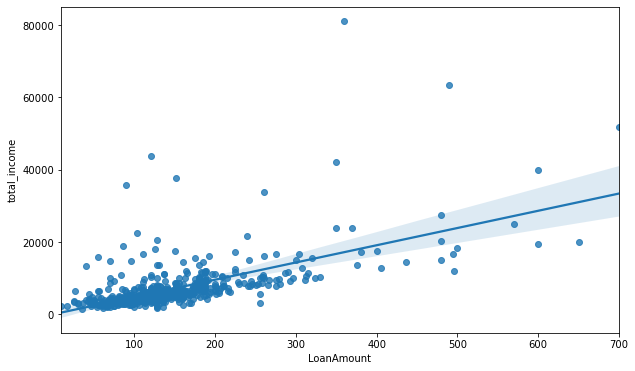

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(x='LoanAmount', y='total_income', data=data)
plt.show()

**Observations:**
- The plot shows that the loan amount is positively correlated with total income. This implies that the loan amount for higher-income applicants is progressively higher.
- There are some outliers visible, showing applicants with low income having been given loans of a higher amount.

Let's check the relationship of total income with loan status

<AxesSubplot:xlabel='Loan_Status', ylabel='total_income'>

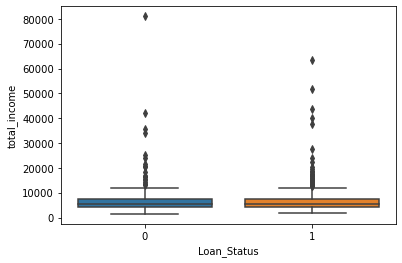

In [15]:
sns.boxplot(x=data.Loan_Status, y=data.total_income)

**Observations:**
- Except for some outliers, there is no major difference between the income of those customers who are eligible versus those who are not. 
- This implies that income alone might not be a good indicator of a customer's loan eligibility.

Let's check how credit history is related to loan status

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

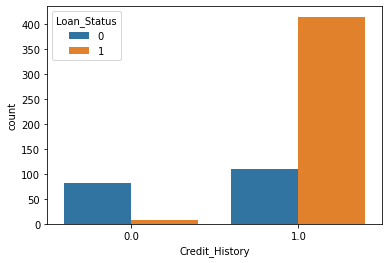

In [16]:
sns.countplot(x=data.Credit_History, hue=data.Loan_Status)

**Observations:**
- The plot shows that credit history is an important factor while checking loan eligibility. There are very few customers whose loan was approved even when their credit history did not meet required guidelines.

Let's check the relationship between education and loan status

<AxesSubplot:xlabel='Education', ylabel='count'>

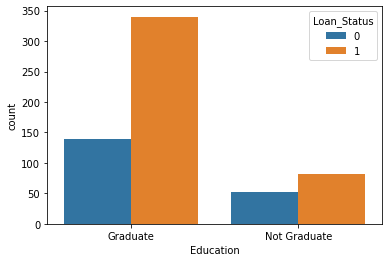

In [17]:
sns.countplot(x=data.Education, hue=data.Loan_Status)

**Observations:**
- We can see that graduate customers are more likely to get loans.
- This might be because, in general, graduate customers have higher income when compared to non-graduates. Let's check if this is true.

<AxesSubplot:xlabel='Education', ylabel='total_income'>

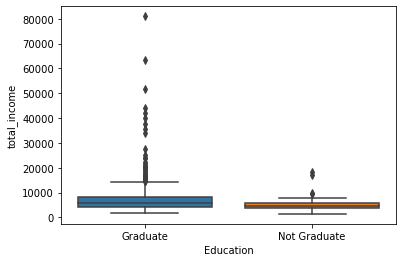

In [18]:
sns.boxplot(x=data.Education, y=data.total_income)

**Observations:**
- We can see that this does appear to be true; graduate customers seem to earn more on average.

Let's check how property area is related with loan status

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

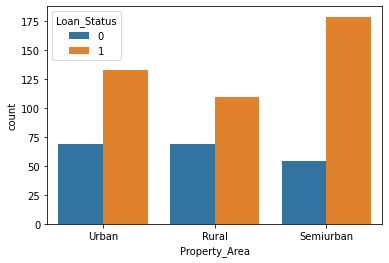

In [19]:
sns.countplot(x=data.Property_Area, hue=data.Loan_Status)

**Observations:**

- The plot shows that more loans are approved for properties in semi-urban areas. 
- This could be due to several reasons. The bank might be charging higher interest rates for semi-urban areas or the current customer base of the company from semi-urban areas might actually be more eligible for home loans based on loan applicant features. We cannot be certain as we don't have the data to support this claim.

**Now that we have processed and explored our data, let's prepare it for modeling.**

## Preparing data for modeling

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

#### Question 3: 

- **Drop the target variable from the original data and store it in a separate dataframe `X` (1 Mark)**
- **Store the target variable in a separate series `Y` (1 Mark)**

In [20]:
#Separating target variable and other variables
Y=data['Loan_Status']
X=data.drop(columns=['Loan_Status']) #drop afterwards

In [21]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [22]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

## Building Classification Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

### Model evaluation criterion:

#### Since this is a binary classification problem, the model can make wrong predictions in one of two ways:
1. Predicting a customer is not eligible for a loan when the customer actually is eligible - Loss of opportunity
2. Predicting a customer is eligible for a loan when the customer is actually not - Financial loss

#### Which case is more important? 
* Predicting that the customer is eligible when he is not, because the person might default or not be able to return the loan, which would result in financial loss to the company.

#### How to reduce this loss i.e need to reduce False Negatives?
* In classification, the class of interest is considered the positive class. Here, the class of interest is 0 i.e. identifying non-eligible customers. So, the company wants to minimize the number of false negatives, in other words **Recall** is the evaluation criterion to be maximized.

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [23]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

#### Question 4: Fit the logistic regression model on the train dataset using random_state=1 (2 Marks)

In [24]:
#define logistic regression model 
log_reg= LogisticRegression(random_state=1)#write your code here
#fit the model
log_reg.fit(X_train,y_train)
#write you code here

LogisticRegression(random_state=1)

**Let's check the coefficient of each dependent variable in the data**

#### Question 5: Write your observations on the below coefficients obtained from the logistic regression model (3 Marks)

In [25]:
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

Credit_History             3.026246
Property_Area_Semiurban    0.821551
Married_Yes                0.189360
Dependents_2               0.154718
Dependents_3+              0.113793
total_income              -0.000010
LoanAmount                -0.000474
Property_Area_Urban       -0.006412
Loan_Amount_Term          -0.065872
Self_Employed_Yes         -0.098514
Gender_Male               -0.106041
Dependents_1              -0.145741
Education_Not Graduate    -0.491757
dtype: float64

**Observations:_________**

These are the coefficient of the features used in the decision function: 
 - Features that positively affect loan attribution are (in order of importance): credit history, being from semiurban area, being married with 2-3 dependents. 
 - Features that negatively affect loan attribution are (in order of importance): being non-Graduate, having 1 dependent, being male, being self employed, asking for long-term repayment, being from urban area, asking for large loan, and having a higher total income.
 - Being from Rural area has been omitted as a redundant dummy variable: we cannot deduce its effect on loan attribution with the above analysis. 

#### Question 6: Write your interpretations of the odds calculated from the logistic regression model coefficients (3 Marks)

In [26]:
odds = np.exp(log_reg.coef_[0]) #finding the odds

#adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
Credit_History,20.619672
Property_Area_Semiurban,2.274024
Married_Yes,1.208476
Dependents_2,1.167329
Dependents_3+,1.120520
total_income,0.999990
LoanAmount,0.999527
Property_Area_Urban,0.993608
Loan_Amount_Term,0.936251
Self_Employed_Yes,0.906183


**Observations:_____**

These are the associated probabilities for the features used for the decision frontier. They are much more meaningful than the coefficients, and their ordering is the same.
- For example, having a good credit history increases 20 times (i.e. by 2000%) the odds of loan attribution This is by far the most important feature. 
- Features with odds <1 lower the odds of loan attribution. For example, being non-graduate results in only 60% chance of loan attribution compared to being graduate. Conversely, this means that being graduate increases 1.66 times the odds of loan attribution. 
- Features with odds ~1 are of less importance, as they do not change the odds of loan attribution significantly.

**Now, let's check the performance of the model on the training set**

#### Question 7: Check the performance on the training data and write your observations from the below classification report and confusion matrix for the training set (3 Marks)

              precision    recall  f1-score   support

           0       0.91      0.44      0.59       131
           1       0.80      0.98      0.88       298

    accuracy                           0.82       429
   macro avg       0.85      0.71      0.74       429
weighted avg       0.83      0.82      0.79       429



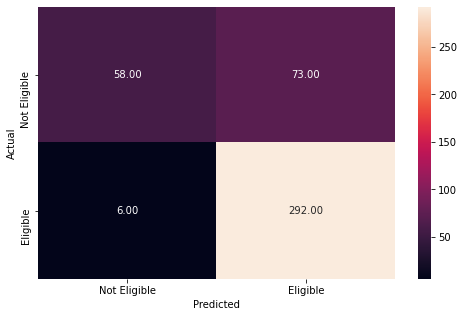

In [27]:
#predict on the training data 
y_pred_train = log_reg.predict(X_train) #Write your code here

# Checking performance on the training data
metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer is not eligible and the customer is actually not eligible
- **False Negative**: Predicting the customer is eligible but the customer is actually not eligible
- **True Negative**: Predicting the customer is eligible and the customer is actually eligible
- **False Positive**: Predicting the customer is not eligible but the customer is actually eligible

**Observations:_____**
- The accuracy is 82% which is good. However, the recall is only 44% for the target class 0, which is low. Given that the goal is to eliminate False Negatives for the target class 0, the model does not perform well. 
- The confusion matrix suggests similar conclusions. The most important metric is the amount of False Negative (Predicted Eligible when Actual Not-Eligible), which is high (73) compared to the very small amount of False Positives (6). 
- The above results suggests that the model favors given loans too easily. We could avoid this by modiying the decision frontier treshold in the Logistic Regression. Another way to improve performances could be to reduce the class unbalance (e.g. by considering a new dataset with 50% approved loans and 50% disapproved loans, instead of the current ratio 70/30%). 

**Precision-Recall Curve for Logistic Regression**

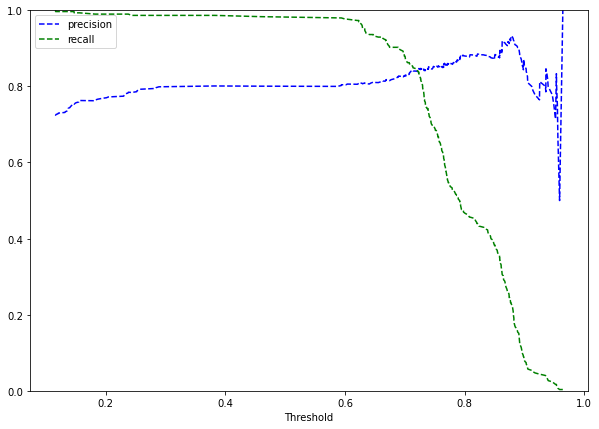

In [28]:
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observations:**
- We can see that precision and recall are balanced for threshold of about 0.7.
- Let's try to calculate the exact threshold where precision and recall are equal.

In [29]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.7222046783243162


- The threshold of 0.72 would give a balanced precision and recall.
- We can choose the threshold to be a bit higher to make the recall higher but then the precision would drop.
- **This decision depends on the stakeholders and other business driven factors.** For example, if the company can bear the cost of some false positives and be more conservative while approving loans then we can choose for the recall to be higher.
- Let's choose the recall to be 0.75 for the current scenario, since we have mentioned that the company wants to optimize recall.
- **Note:** We also don't want the precision to be so poor that it outweighs the benefits of a higher recall. 

#### Question 8: Compare the performance of the model on training and testing sets after changing the threshold (2 Marks)

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       131
           1       0.85      0.69      0.76       298

    accuracy                           0.70       429
   macro avg       0.68      0.71      0.68       429
weighted avg       0.75      0.70      0.71       429



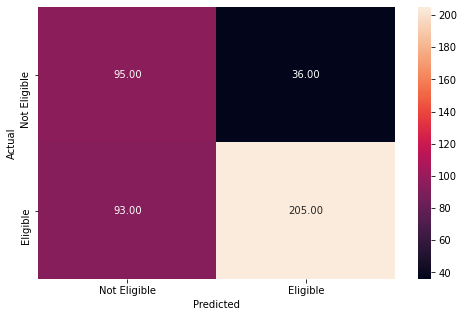

In [30]:
optimal_threshold1 = 0.75
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.56      0.66      0.60        61
           1       0.81      0.74      0.78       124

    accuracy                           0.71       185
   macro avg       0.68      0.70      0.69       185
weighted avg       0.73      0.71      0.72       185



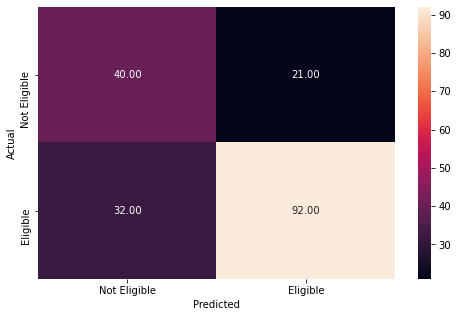

In [31]:
#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:____**
- We have considerably improved the recall (around 70% compared to former 44%) by modifying the decision frontier treshold. 
- The recall is slighly higher for train data (73%) compared to the test data (66%). This suggests that the model is slightly overfitted. Nevertheless, the difference isnt too drastic and we can conclude that the model is generalizable to some extent. We could reduce the overfitting by using a stronger regularization (as well as modifying other hyperparameters as tested e.g. through gridSearch). 
- The accuracy and precision are roughly the same between train and test dataset, but these metrics are of less importance. 
- We have checked that class unbalance is the same in the test and train dataset (roughly 70% accepted loans in each dataset). The changes in performance between train and test are not due to class unbalance. 

### K - Nearest Neighbors (KNN)

- KNN is a distance based algorithm and all distance based algorithms are affected by the scale of the data.
- We will scale the attributes (dataframe X defined above) before building the KNN model.

**But before actually building the model, we need to identify the value of K to be used in KNN. We will perform the following steps for the same.**

- For every value of K (from 1 to 20), split the train set into new train and validation set (30 times)
- Scale the training data and validation data
- Take the average of the error on these train and the validation sets for each K
- Plot the average train vs the validation set error for all Ks 
- Choose a suitable K from the plot where the two errors are comparable

In [32]:
knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,21):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20)
    
        #let us scale the data
        x_train_new = ss.fit_transform(x_train_new)  #fit_transform the training data
        x_val = ss.transform(x_val) #transform the validation set
        #Fitting knn on training data
        knn.fit(x_train_new, y_train_new)
        #Calculating error on training and validation data
        train_error.append(1 - knn.score(x_train_new, y_train_new)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.2643410852713178],
 2: [0.11603498542274052, 0.34302325581395343],
 3: [0.16083576287657916, 0.22790697674418617],
 4: [0.1611273080660836, 0.28449612403100766],
 5: [0.1882410106899903, 0.21240310077519384],
 6: [0.18911564625850338, 0.2387596899224807],
 7: [0.19319727891156468, 0.21046511627906975],
 8: [0.18639455782312925, 0.23604651162790702],
 9: [0.19951409135082607, 0.20387596899224814],
 10: [0.20126336248785226, 0.21511627906976755],
 11: [0.2001943634596696, 0.21434108527131787],
 12: [0.19591836734693877, 0.22596899224806197],
 13: [0.20272108843537417, 0.20968992248062018],
 14: [0.19786200194363462, 0.20542635658914735],
 15: [0.19970845481049565, 0.21356589147286828],
 16: [0.1980563654033042, 0.19883720930232568],
 17: [0.20272108843537412, 0.20581395348837214],
 18: [0.1995140913508261, 0.19689922480620162],
 19: [0.20524781341107878, 0.19418604651162788],
 20: [0.19990281827016518, 0.2007751937984497]}

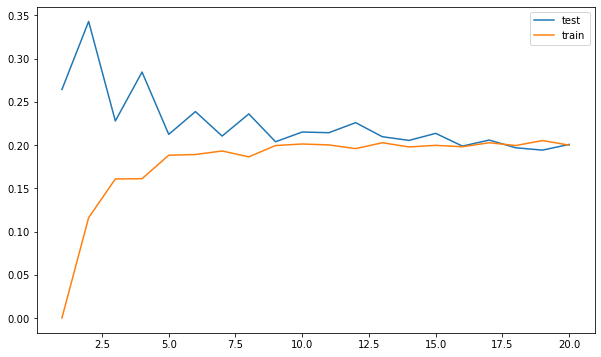

In [33]:
# Extracting the train and the test error for each k in a list for easy plotting

kltest = []
vltest = []
for k, v in knn_many_split.items():
    kltest.append(k)
    vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    vltrain.append(knn_many_split[k][0])

# Plotting k vs error 
plt.figure(figsize=(10,6))
plt.plot(kltest,vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.show()

**Observations:**
- We can see that the train error and the test error are more or less similar for K more than or equal to 7.
- This implies that we would get generalized results if we choose K=7.
- So, let's scale the full data and fit the model on the entire training set. 

In [34]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

In [35]:
#Fitting the model on the scaled data
knn = KNeighborsClassifier(n_neighbors = 7, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

**Now, let's check the performance of the model on the training and testing data**

#### Question 9: 

- **Check the performance of the model on the training and testing data (2 Marks)**
- **Compare the performance and write your observations (2 Marks)**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       298

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



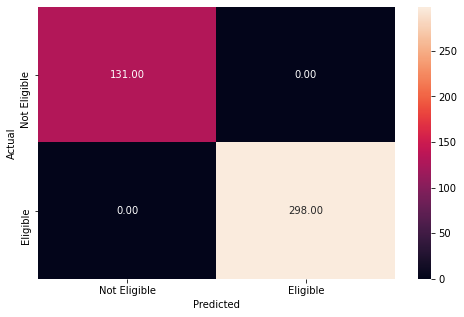

In [36]:
#predict on train data
y_pred_train_knn = knn.predict(X_train_scaled)# write your code here

#checking performance of the model
metrics_score(y_train, y_pred_train_knn)

**Observations:____**
- All outcomes are predicted perfectly (accuracy, precision and recall are all 100%, f1-score is 1).
- This is likely an extremely overfitted model (results are too good to be true).

              precision    recall  f1-score   support

           0       0.61      0.31      0.41        61
           1       0.73      0.90      0.81       124

    accuracy                           0.71       185
   macro avg       0.67      0.61      0.61       185
weighted avg       0.69      0.71      0.68       185



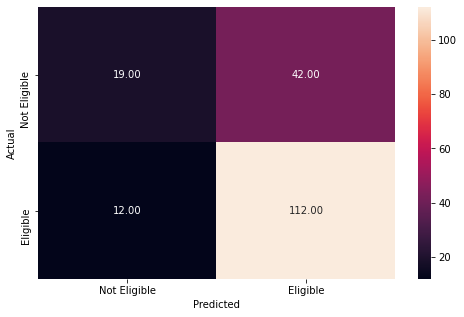

In [39]:
#predict on test data
y_pred_test_knn = knn.predict(X_test_scaled)# Write your code here

#checking performance of the model
metrics_score(y_test, y_pred_test_knn)

**Observation:____**
- The recall is extremely low for the test dataset (31%). The accuracy (70%) and precision (61% for target class) are also low.
- This is because the model is extremely overfitted. This is therefore a model with poor performances that cannot be generalized.

#### Question 10: Write the conclusion on the key factors that are driving the approval of loan and write your recommendations to the business on how can they minimize the credit risk. (5 Marks)

## Conclusion:

We have built several models (Logistic Regression, k-nn) to predict credit risk (failure to repay loan interests). 

**Exploratory Data Analysis**:

- Bivariate analysis (scatterplots for numerical variables, and countplots for categorical variables) suggests that loan acceptance is more likely for good credit history, higher education, and semi-urban area. Interestingly, its doesnt correlate with income. 
- Loan amounts and income features are highly right-skewed: a few applicants are high earners, a few applicants apply for very large loans. These features also very correlated (which is undesirable due to multicollinearity at least for the Logisitc Regression model).
- The data is slightly unbalanced with around 70% accepted loan vs 30% rejected loans. This might slightly affect the results but doesnt require drastic measures (e.g. random undersampling, SMOTE...). 

**Model Building: Logistic Regression**
- There were several missing values which we have filled using mode (for categorical features) or median (for numerical features). 
- We feature engineered Total Income (replacing Applicant and Co-applicant Income) to reduce the number of features (and likely avoid strong multicollinearity). 
- We feature engineered numerical variables for each categorical variable using One-Hot Encoding. This is required for both the Logistic Regression and K-nn model. 

**Model Performances: Logistic Regression**
- The Logistic regression provides parametric coefficients (odds) which allows to understand the most predictive features. These are by far having a good Credit History (20 times more likely to obtain loan), followed by being in a semiurban area (2 times), being graduated (1.66 times), etc. 
- For this problem it is much more important to avoid False Negatives (Predict Egibility when it isnt) than False Positives. This means we are more interested in maximizing Recall than Precision. We have determined an ideal decision treshold at probability=0.75 (for which Precision ~= Recall). This decision treshold greatly increases the Recall compared to the default probability=0.5
- The Logistic Regression model is slightly overfitted (as seen by comparing scores between train and test datasets) but still generalizable. 

**Model: k-nn**
- We also build a k-nn model (using grid-search and cross-validation to determine an optimal number of neighbors k=7). However, the model proves to be extremely overfitted (with 100% accuracy on train dataset) and cannot be generalized.

## Recommendations:

**Model Use:**
- The Logistic Regression model has good predictive power (recall around 70% for the target class of loan default), and is generalizable despite being slightly overfitted. This model can be used for predictions although a few checks (listed below) would still be recommended. 
- Meanwhile, the k-nn model is clearly overfitted and cannot be used in its current state. 

**Model Improvements:**
- For the logistic regression, we havent tested all assumptions (no multicollinearity, p-values for parameter estimates, homoscedasticity, etc). This would be required for a final model. In particular, checking for p-values and removing non-significant features would make for a more explainable model. We also need to perform cross-validation using e.g. k-folds instead of the current method of Hold-Out Validation that is more error-prone.
- We could further improves the Logistic Regression model by tuning hyperparameters (using gridSearch). 
- Due to the data being slightly unbalanced (around 70% accepted loans), it would be important to train/test split using the stratified=True hyperparameter (which conserves ratio). 
- We have filled missing values of Loan_Term (numerical feature) with the mode, this is likely a typo and we should use the median instead. 
- The k-nn model is clearly overfitted but could be improved through regularization (e.g. grid-search of best hyperparameters). The Logistic Regression model is superior anyway for performances with the added advantage of being parametric with more explainability. 